In [60]:
import pylab as plt
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from bayes_filter.misc import safe_cholesky



In [69]:
def rbf(r):
    return np.exp(-0.5*r**2)

def m52(r):
    return (1. + np.sqrt(5)*r + 5./3. * r**2)*np.exp(-np.sqrt(5)*r)

def m32(r):
    return (1. + np.sqrt(3)*r)*np.exp(-np.sqrt(3)*r)

def m12(r):
    return np.exp(-r)


print(np.interp(0.5,m12(r)[::-1],r[::-1]))
print(np.interp(0.5,m32(r)[::-1],r[::-1]))
print(np.interp(0.5,m52(r)[::-1],r[::-1]))
print(np.interp(0.5,rbf(r)[::-1],r[::-1]))

0.6931475322871868
0.9689941038812221
1.0421225512720391
1.1774100902789881


In [77]:
with tf.Session(graph=tf.Graph()) as sess:
    names = ['Exp. Quad.', r'Mat\'ern-52', r'Mat\'ern-32', r'Mat\'ern-12']
    kerns = [tfp.positive_semidefinite_kernels.ExponentiatedQuadratic(length_scale=tf.constant(1.1774,tf.float64)), 
               tfp.positive_semidefinite_kernels.MaternFiveHalves(length_scale=tf.constant(1.0421,tf.float64)),
              tfp.positive_semidefinite_kernels.MaternThreeHalves(length_scale=tf.constant(0.9689,tf.float64)), 
               tfp.positive_semidefinite_kernels.MaternOneHalf(length_scale=tf.constant(0.6931,tf.float64))]
#     kerns = [k(amplitude=1., length_scale=1.) for k in kernels]
    x = tf.cast(tf.linspace(0.,8.,100),tf.float64)
    X,Y = tf.meshgrid(x,x,indexing='ij')
    X = tf.stack([tf.reshape(X,(-1,)), tf.reshape(Y,(-1,))],axis=1)
    
    K = [k.matrix(X,X) for k in kerns]
    L = [tf.cholesky(k + tf.constant(1e-6,tf.float64)*tf.eye(100**2,dtype=tf.float64)) for k in K]
    Z = tf.random_normal(shape=(100**2,1),dtype=tf.float64)
    I = [tf.matmul(l,Z) for l in L]
    I = sess.run(I)

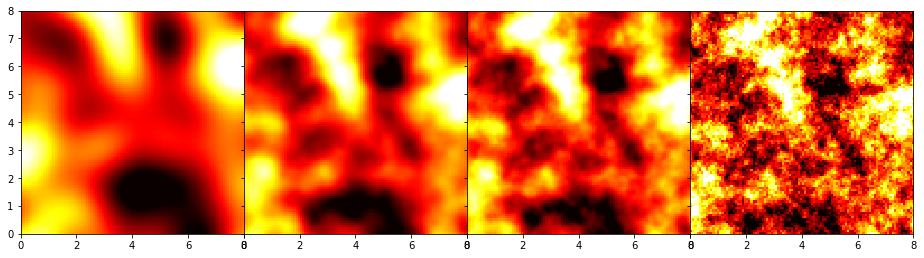

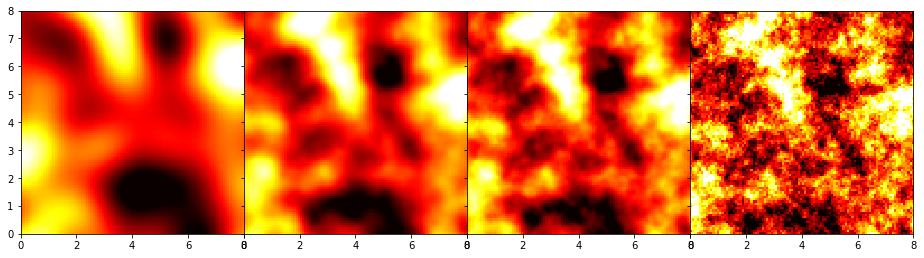

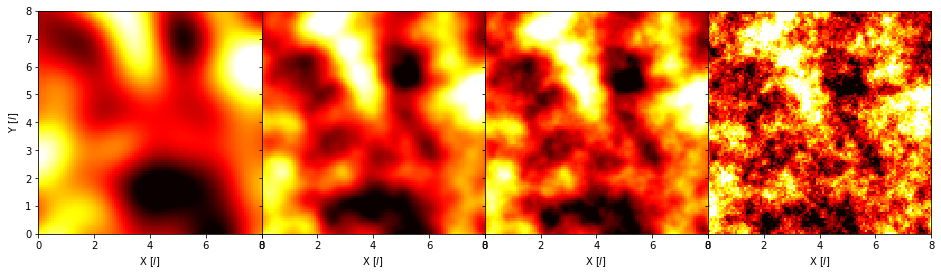

In [83]:
fig, axs = plt.subplots(1,4,sharex=True,sharey=True,figsize=(16,8))
vmin,vmax=np.percentile(np.array(I),[3,97])
for k,ax in zip(I,axs):
    ax.imshow(k.reshape((100,100)),cmap='hot',extent=(0,8,0,8),origin='lower',vmin=vmin,vmax=vmax)
fig.subplots_adjust(hspace=0, wspace=0)
plt.show()

fig, axs = plt.subplots(1,4,sharex=True,sharey=True,figsize=(16,8))
for k,ax in zip(I,axs):
    ax.imshow(k.reshape((100,100)),cmap='hot',extent=(0,8,0,8),origin='lower',vmin=vmin,vmax=vmax)
fig.subplots_adjust(hspace=0, wspace=0)
plt.show()

fig, axs = plt.subplots(1,4,sharex=True,sharey=True,figsize=(16,8))
for k,ax in zip(I,axs):
    ax.imshow(k.reshape((100,100)),cmap='hot',extent=(0,8,0,8),origin='lower',vmin=vmin,vmax=vmax)
    
    ax.set_xlabel(r'X [$l$]')
axs[0].set_ylabel(r'Y [$l$]')
fig.subplots_adjust(hspace=0, wspace=0)
plt.savefig("kernels.png")
plt.show()

In [11]:
I[0].shape

(10000, 1)